In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
df = pd.read_csv(os.path.join(os.path.pardir, "data", "laptop_price.csv"), encoding_errors = "ignore")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]
num_cols = [col for col in df.columns if df[col].dtype != "object"]

Text(0.5, 1.0, 'Distribution of Laptop Prices')

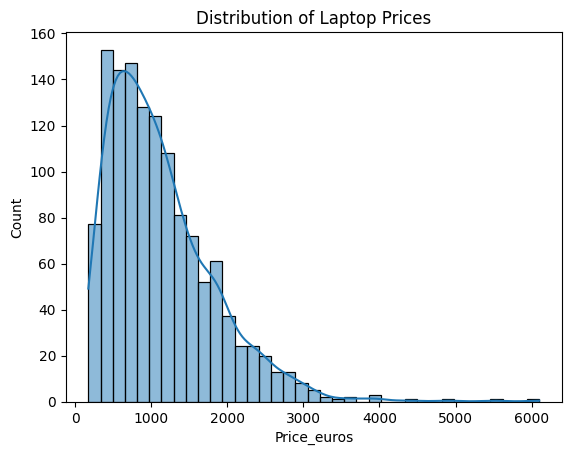

In [4]:
# first check the distribution of prices "Target Variable"
sns.histplot(data = df, x = "Price_euros", kde = True)
plt.title("Distribution of Laptop Prices")

In [5]:
# check number of distinct values in categorical columns..
for col in cat_cols:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}, Number of Unique Values: {len(df[col].unique())}")

Column: Company
Unique Values: ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG'], Number of Unique Values: 19
Column: Product
Unique Values: ['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)' 

In [6]:
# Unique Values of RAM: ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB'], Number of Unique Values: 9
# all of RAM Values are in Giga Byte Unit so Remove the last two letters, and convert to int8
df["Ram"] = df["Ram"].apply(lambda x: x[:-2])
df["Ram"] = df["Ram"].astype("int8")
# all of Weight Values are in Kilogram Unit so Remove the last two letters, and convert to float16
df["Weight"] = df["Weight"].apply(lambda x: x[:-2])
df["Weight"] = df["Weight"].astype("float16")

Text(0.5, 1.0, 'Distribution of Laptop Weights')

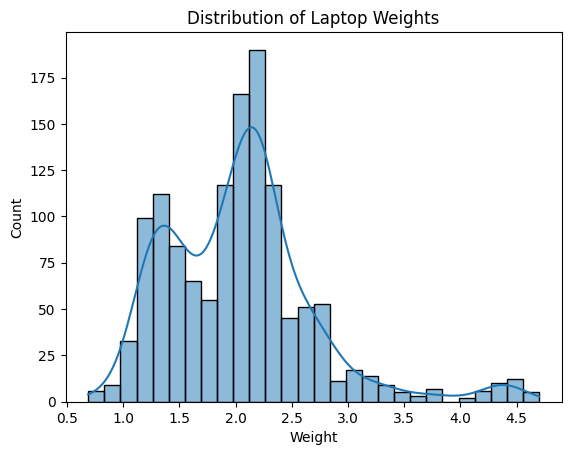

In [7]:
# distribution of Weight and Linear/non-Linear correlation with target..
sns.histplot(data = df, x = "Weight", kde = True)
plt.title("Distribution of Laptop Weights")

/var/folders/j9/57z33pgx66ng5_vmqjhktgz80000gn/T/ipykernel_83235/538342646.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.title(f"Linear Correlation Plot between Weights and Prices, {np.round(df.corr().loc['Weight', 'Price_euros'], 3)}")


Text(0.5, 1.0, 'Linear Correlation Plot between Weights and Prices, 0.21')

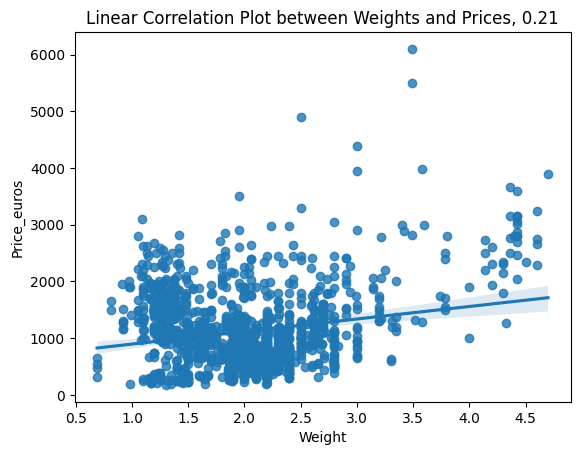

In [8]:
# somehow there is a weak linear Relation between Weights and Prices.
# some laptops between (2.5, 3.5) are outliers.
sns.regplot(data = df, x = "Weight", y = "Price_euros")
plt.title(f"Linear Correlation Plot between Weights and Prices, {np.round(df.corr().loc['Weight', 'Price_euros'], 3)}")

Text(0.5, 1.0, 'Distribution of Laptop inches')

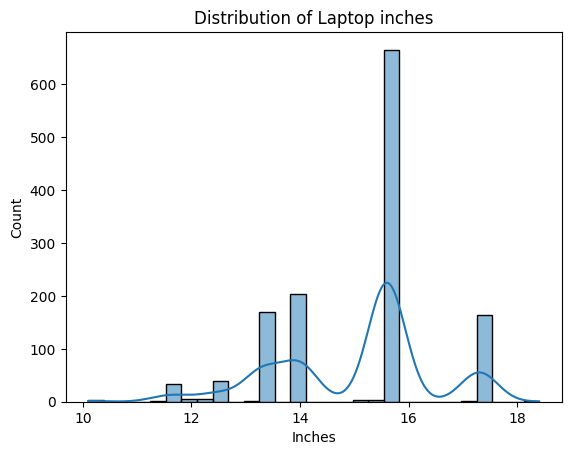

In [9]:
# inches distribution and correlation with Price.
sns.histplot(data = df, x = "Inches", kde = True)
plt.title("Distribution of Laptop inches")

/var/folders/j9/57z33pgx66ng5_vmqjhktgz80000gn/T/ipykernel_83235/1595939321.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.title(f"Linear Correlation Plot between Laptop Inches and Prices, {np.round(df.corr().loc['Inches', 'Price_euros'], 3)}")


Text(0.5, 1.0, 'Linear Correlation Plot between Laptop Inches and Prices, 0.068')

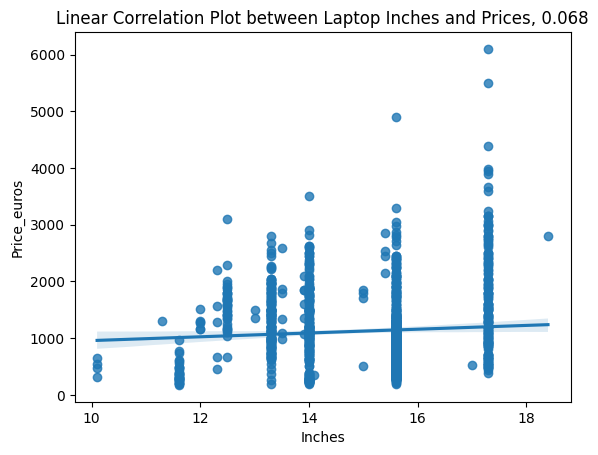

In [10]:
sns.regplot(data = df, x = "Inches", y = "Price_euros")
plt.title(f"Linear Correlation Plot between Laptop Inches and Prices, {np.round(df.corr().loc['Inches', 'Price_euros'], 3)}")

Text(0.5, 1.0, 'Price Distribution of each RAM Size')

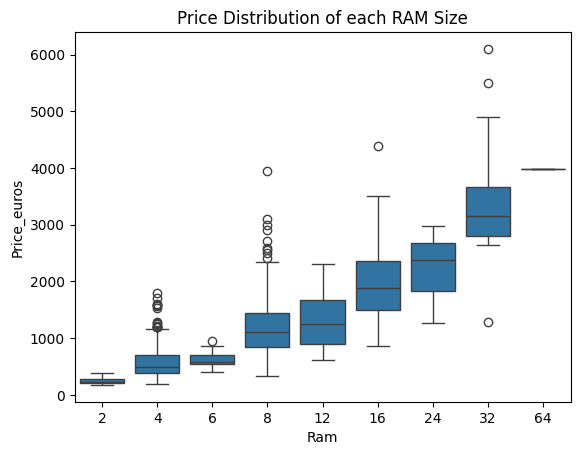

In [11]:
# RAM Size is a distcrete value only 9 values
# check distribution of each RAM Value to see.
# different distributions, different medians between each ram size, different IQR
# Ram is good feature to use in predicting prices.
sns.boxplot(data = df, x = "Ram", y = "Price_euros")
plt.title("Price Distribution of each RAM Size")

In [12]:
# alot of values in Product column
# may cause high cardinality issues in prediction phase
# also information may be in another columns
# no information needed from it.
df.drop("Product", axis = 1, inplace = True)

In [13]:
# Cpu Column 
# information can be extracted from Cpu like frequency in GHz, Cpu Manufacturer, Cpu Model
# most Cpu Patterns are like this [AMD, A9-Series, 9420, 2.9GHz]
# first value is Manufacturer, last value is frequency
df["CPU_manufacturer"] = df["Cpu"].apply(lambda x: x.split()[0])
df["CPU_frequency"] = df["Cpu"].apply(lambda x: x.split()[-1])
df["CPU_model"] = df["Cpu"].apply(lambda x: x.split()[1:-1])
df.drop("Cpu", axis = 1, inplace = True)

In [14]:
# distinct values in CPU Manufacturer
# much better
df["CPU_manufacturer"].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [15]:
# all of CPU Frequencies in GHz
# remove the last three letters and convert it to float 16
df["CPU_frequency"] = df["CPU_frequency"].apply(lambda x: x[:-3])

In [16]:
df["CPU_frequency"] = df["CPU_frequency"].astype("float16")

Text(0.5, 1.0, 'Price Distribution of each CPU Manufacturer')

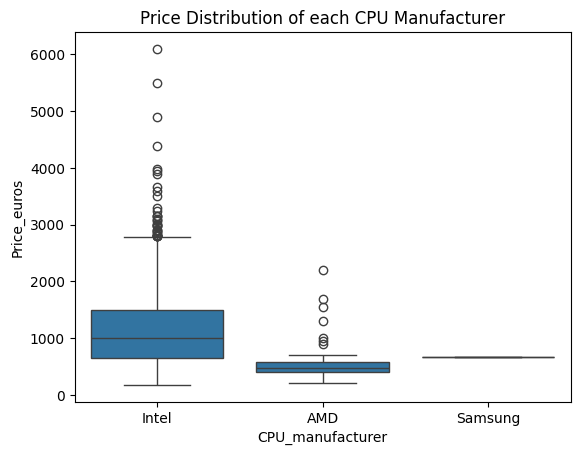

In [17]:
sns.boxplot(data = df, x = "CPU_manufacturer", y = "Price_euros")
plt.title("Price Distribution of each CPU Manufacturer")

Text(0.5, 1.0, 'Distribution of CPU Frequency')

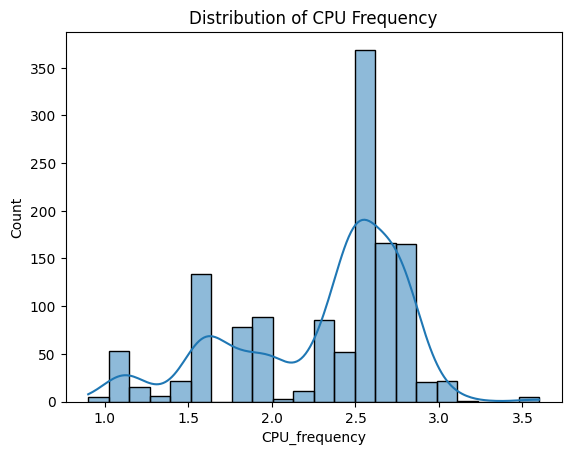

In [18]:
# distribution of CPU Frequency and Linear/non-Linear correlation with target..
sns.histplot(data = df, x = "CPU_frequency", kde = True)
plt.title("Distribution of CPU Frequency")

/var/folders/j9/57z33pgx66ng5_vmqjhktgz80000gn/T/ipykernel_83235/1676099042.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.title(f"Linear Correlation Plot between CPU frequency and Prices, {np.round(df.corr().loc['CPU_frequency', 'Price_euros'], 3)}")


Text(0.5, 1.0, 'Linear Correlation Plot between CPU frequency and Prices, 0.43')

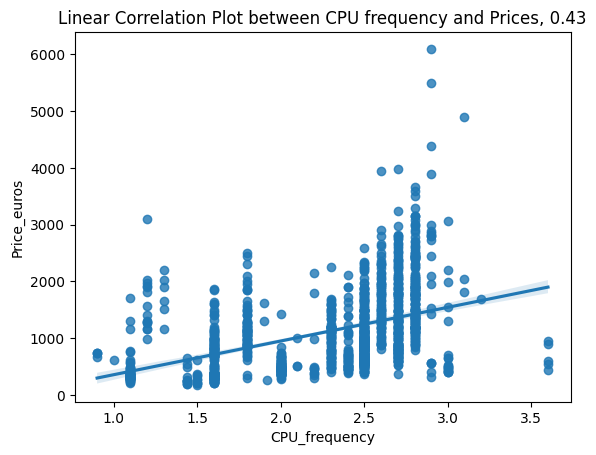

In [19]:
sns.regplot(data = df, x = "CPU_frequency", y = "Price_euros")
plt.title(f"Linear Correlation Plot between CPU frequency and Prices, {np.round(df.corr().loc['CPU_frequency', 'Price_euros'], 3)}")

<Axes: xlabel='CPU_frequency', ylabel='Price_euros'>

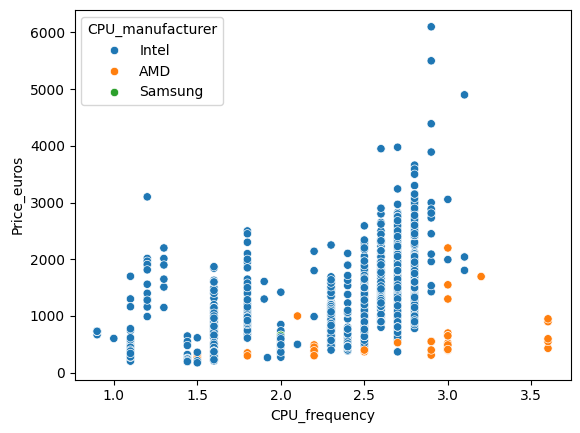

In [20]:
# cpu frequency correlation with prices for each manufacturer..
# most of devices are intel
# intel CPUs are higher and more than AMD and Samsung..
sns.scatterplot(data = df, x = "CPU_frequency", y = "Price_euros", hue = "CPU_manufacturer")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

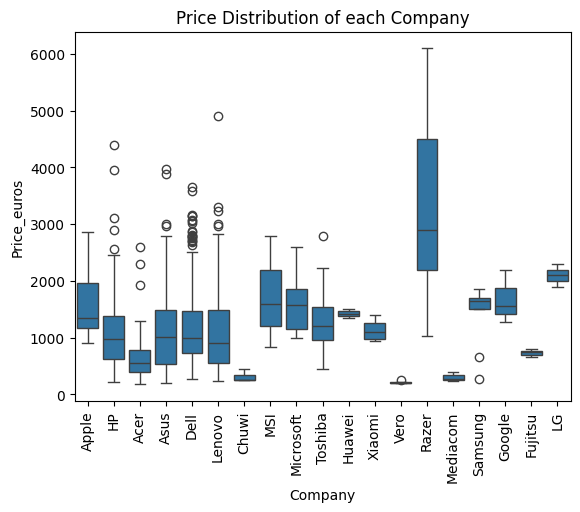

In [21]:
# different distribution for wach company..
sns.boxplot(data = df, x = "Company", y = "Price_euros")
plt.title("Price Distribution of each Company")
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

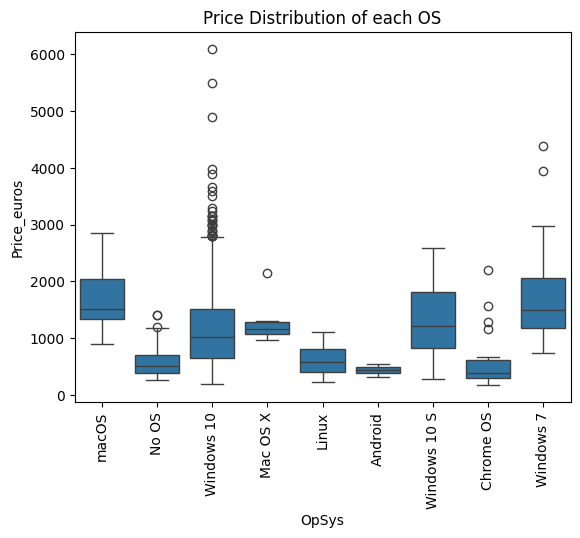

In [22]:
# OS of oulier prices is Windows 10 and Windows 7..
# different distribution for each OS.
# Mac and Windows are high in Prices compared to others...
sns.boxplot(data = df, x = "OpSys", y = "Price_euros")
plt.title("Price Distribution of each OS")
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

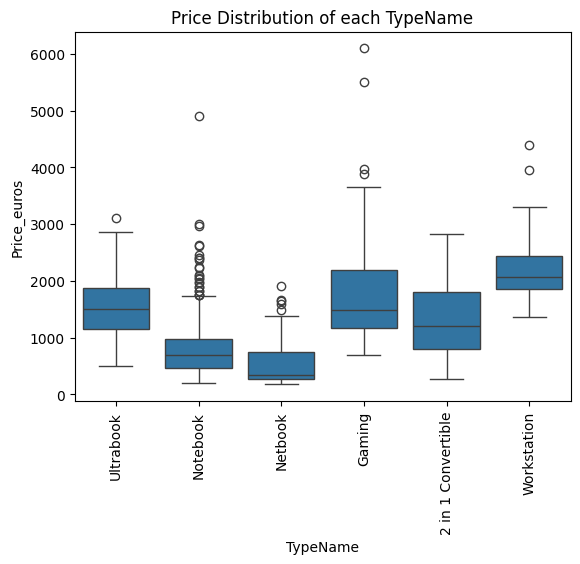

In [23]:
# TypeName
# different distributions in TypeName
# median or distribution of Workstation devices is relativly hogh compared to the other.
# Netbook devices have small prices compared to other types.
# strong outliers in Gaming devices and Notebook
sns.boxplot(data = df, x = "TypeName", y = "Price_euros")
plt.title("Price Distribution of each TypeName")
plt.xticks(rotation = 90)

In [24]:
# screen resolution
# height and width of screen in pixels
# convert both to cm and get the area of the screen..
df["screen_width_cm"] = df["ScreenResolution"].apply(lambda x:int(x.split()[-1].split(sep = "x")[0]) * 0.0264583333) 
df["screen_height_cm"] = df["ScreenResolution"].apply(lambda x:int(x.split()[-1].split(sep = "x")[1]) * 0.0264583333)
df["screen_area_cm2"] = df["screen_width_cm"] * df["screen_height_cm"] 

In [25]:
# Search for Touchscreen, 4K Ultra HD, HD+, Full HD, IPS Panel, Quad, Retina Display
df["is_4K"] = df["ScreenResolution"].apply(lambda x: 1 if "4K Ultra HD" in x else 0)
df["is_touchscreen"] = df["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)
df["is_full_HD"] = df["ScreenResolution"].apply(lambda x: 1 if "Full HD" in x else 0)
df["is_Quad"] = df["ScreenResolution"].apply(lambda x: 1 if "Quad" in x else 0)
df["is_HD+"] = df["ScreenResolution"].apply(lambda x: 1 if "HD+" in x else 0)
df["is_ips_panel"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS Panel" in x else 0)
df["is_retina_display"] = df["ScreenResolution"].apply(lambda x: 1 if "Retina Display" in x else 0)

In [26]:
df.drop(["ScreenResolution", "screen_width_cm", "screen_height_cm"], axis = 1, inplace = True)

Text(0.5, 1.0, 'Distribution of screen area in cm')

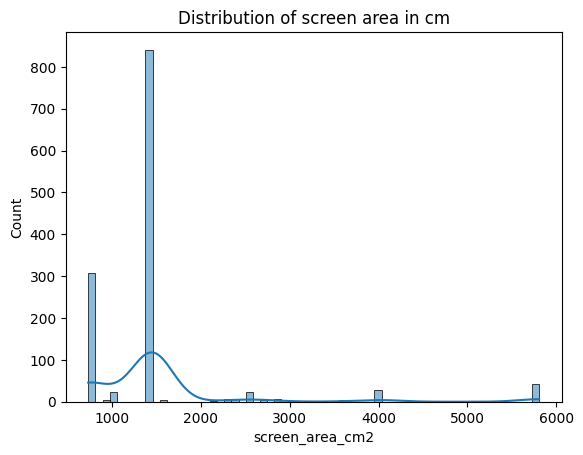

In [27]:
# check distribution of screen area and correlation...
sns.histplot(data = df, x = "screen_area_cm2", kde = True)
plt.title("Distribution of screen area in cm")

/var/folders/j9/57z33pgx66ng5_vmqjhktgz80000gn/T/ipykernel_83235/118793166.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.title(f"Linear Correlation Plot between CPU frequency and Prices, {np.round(df.corr().loc['screen_area_cm2', 'Price_euros'], 3)}")


Text(0.5, 1.0, 'Linear Correlation Plot between CPU frequency and Prices, 0.515')

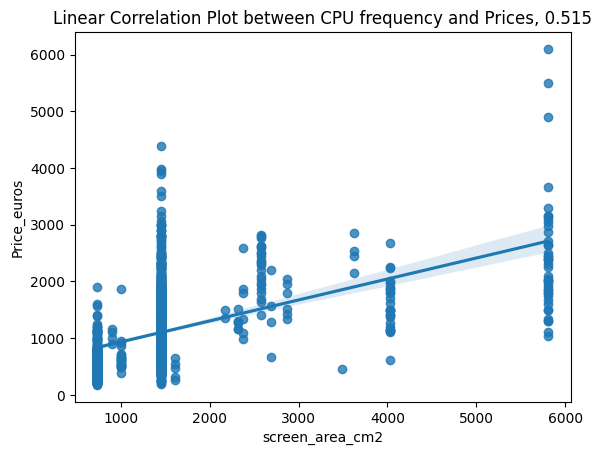

In [28]:
sns.regplot(data = df, x = "screen_area_cm2", y = "Price_euros")
plt.title(f"Linear Correlation Plot between CPU frequency and Prices, {np.round(df.corr().loc['screen_area_cm2', 'Price_euros'], 3)}")

<Axes: xlabel='screen_area_cm2', ylabel='Price_euros'>

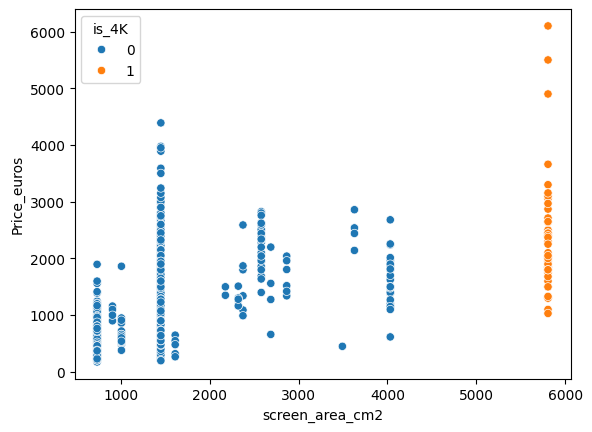

In [29]:
# most 4K Screens have high screen area and the three outliers in dataset are 4K
# all 4K Screens have larger Screens.
sns.scatterplot(data = df, x = "screen_area_cm2", y = "Price_euros", hue = "is_4K")

<Axes: xlabel='screen_area_cm2', ylabel='Price_euros'>

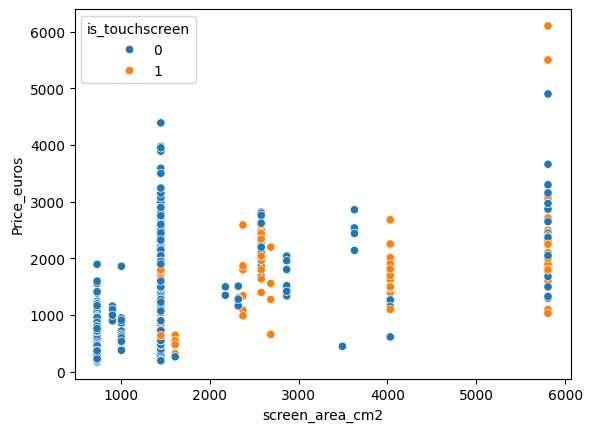

In [30]:
sns.scatterplot(data = df, x = "screen_area_cm2", y = "Price_euros", hue = "is_touchscreen")

In [31]:
# storage...
# first see if device has SSD, HDD or Hybrid Storage Type..
df["is_ssd"] = df["Memory"].apply(lambda x: 1 if "SSD" in x else 0)
df["is_hdd"] = df["Memory"].apply(lambda x: 1 if "HDD" in x else 0)
df["is_hybrid_storage"] = df["Memory"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["is_flash_storage"] = df["Memory"].apply(lambda x: 1 if "Flash" in x else 0)

In [32]:
# multible storage types..
df["unique_storage_types"] = df["is_ssd"] + df["is_hdd"] + df["is_hybrid_storage"] + df["is_flash_storage"]

Text(0.5, 1.0, 'Price Distribution of each number of storage types')

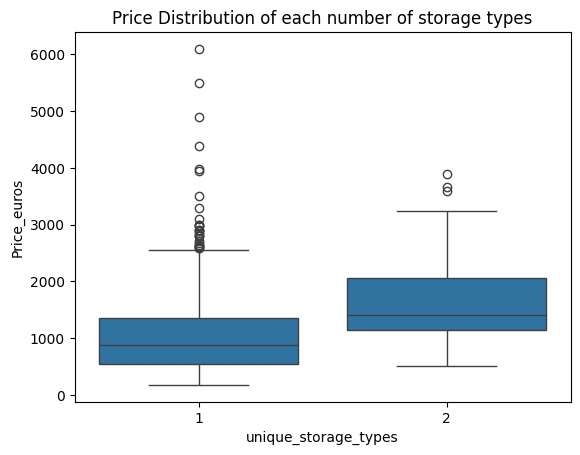

In [33]:
# devices that have 2 storage options are shifted to the right compared to devices that has 1
# but alot of outliers in 1 device.
# the top outliers (3 devices) all have 1 storage option...
sns.boxplot(data = df, x = "unique_storage_types", y = "Price_euros")
plt.title("Price Distribution of each number of storage types")

In [34]:
def handle_storage_space(x):
    pattern = "\d+"
    spaces_lst = []
    for val in x.split():
        if "GB" in val or "TB" in val:
            if "TB" in val:
                spaces_lst.append(int(re.findall("\d+", val)[0])*1000)
            else:
                spaces_lst.append(int(re.findall("\d+", val)[0]))
    return sum(spaces_lst)

In [35]:
df["total_storage"] = df["Memory"].apply(handle_storage_space)

In [36]:
df.drop("Memory", axis = 1, inplace = True)

Text(0.5, 1.0, 'Distribution of total stoarge')

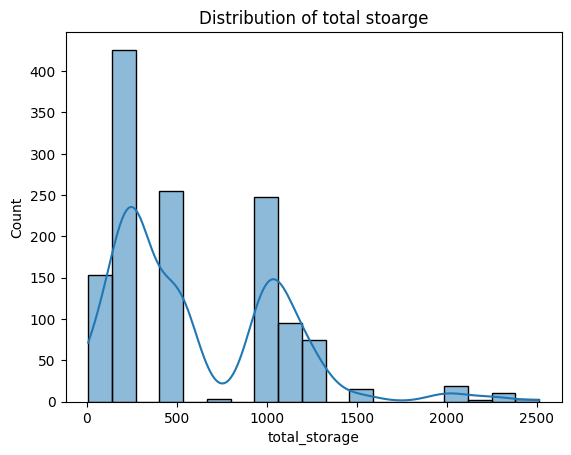

In [37]:
# check distribution of total storage and correlation...
sns.histplot(data = df, x = "total_storage", kde = True)
plt.title("Distribution of total stoarge")

/var/folders/j9/57z33pgx66ng5_vmqjhktgz80000gn/T/ipykernel_83235/3520731372.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.title(f"Linear Correlation Plot between Total Storage and Prices, {np.round(df.corr().loc['total_storage', 'Price_euros'], 3)}")


Text(0.5, 1.0, 'Linear Correlation Plot between Total Storage and Prices, 0.161')

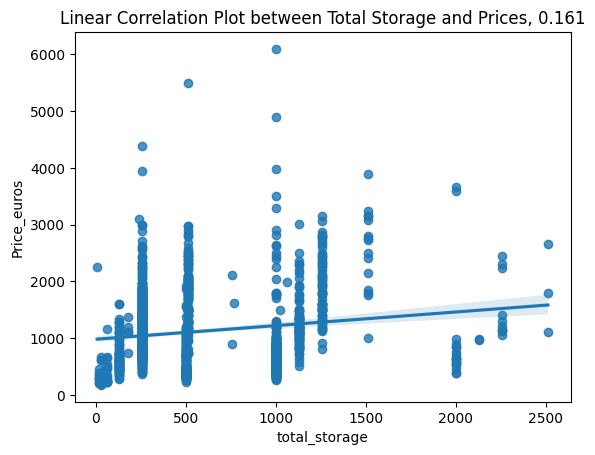

In [38]:
sns.regplot(data = df, x = "total_storage", y = "Price_euros")
plt.title(f"Linear Correlation Plot between Total Storage and Prices, {np.round(df.corr().loc['total_storage', 'Price_euros'], 3)}")

<Axes: xlabel='total_storage', ylabel='Price_euros'>

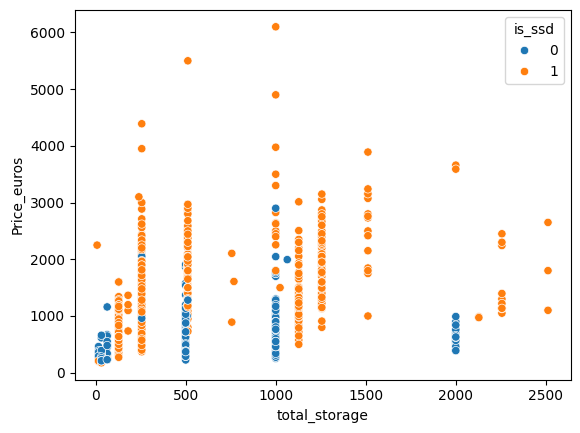

In [39]:
sns.scatterplot(data = df, x = "total_storage", y = "Price_euros", hue = "is_ssd")

<Axes: xlabel='total_storage', ylabel='Price_euros'>

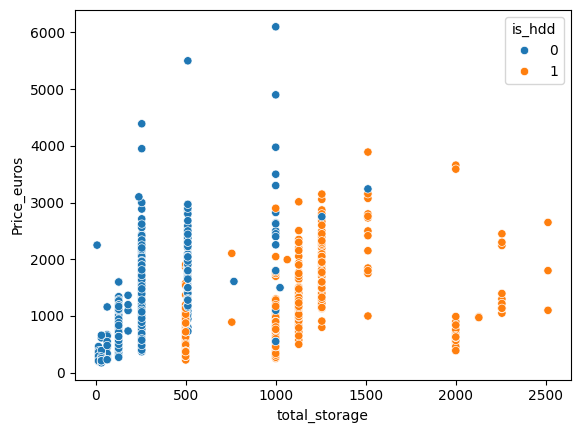

In [40]:
sns.scatterplot(data = df, x = "total_storage", y = "Price_euros", hue = "is_hdd")

In [41]:
# GPU Manufacturer
df["GPU_manufacturer"] = df["Gpu"].apply(lambda x:x.split()[0])
df.drop("Gpu", axis = 1, inplace = True)

Text(0.5, 1.0, 'Price Distribution of each GPU Manufacturer')

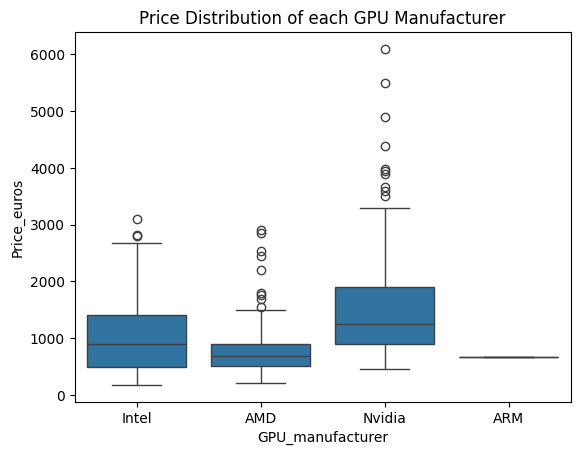

In [42]:
sns.boxplot(data = df, x = "GPU_manufacturer", y = "Price_euros")
plt.title("Price Distribution of each GPU Manufacturer")